In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv('C:\\Users\\hp\\AAPL.csv')

In [3]:
df.shape

(10468, 7)

In [26]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [9]:
df.set_index('Date',inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10468 non-null  float64
 1   High       10468 non-null  float64
 2   Low        10468 non-null  float64
 3   Close      10468 non-null  float64
 4   Adj Close  10468 non-null  float64
 5   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 572.5 KB


In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [12]:
#sorting the indexes 
df.sort_index(inplace= True)

In [13]:
#data normalization 
scaler= MinMaxScaler()
scaler_values= scaler.fit_transform(df[df.columns])

In [14]:
scaler_values

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 6.31981003e-02],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 2.36989104e-02],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 1.42459064e-02],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 1.23332565e-02],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 1.45687326e-02],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 1.80712734e-02]])

In [15]:
df_scaled=pd.DataFrame(scaler_values,columns = df.columns,index= df.index)

In [16]:
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.063198
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.023699
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.014246
1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.011647
1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.009897


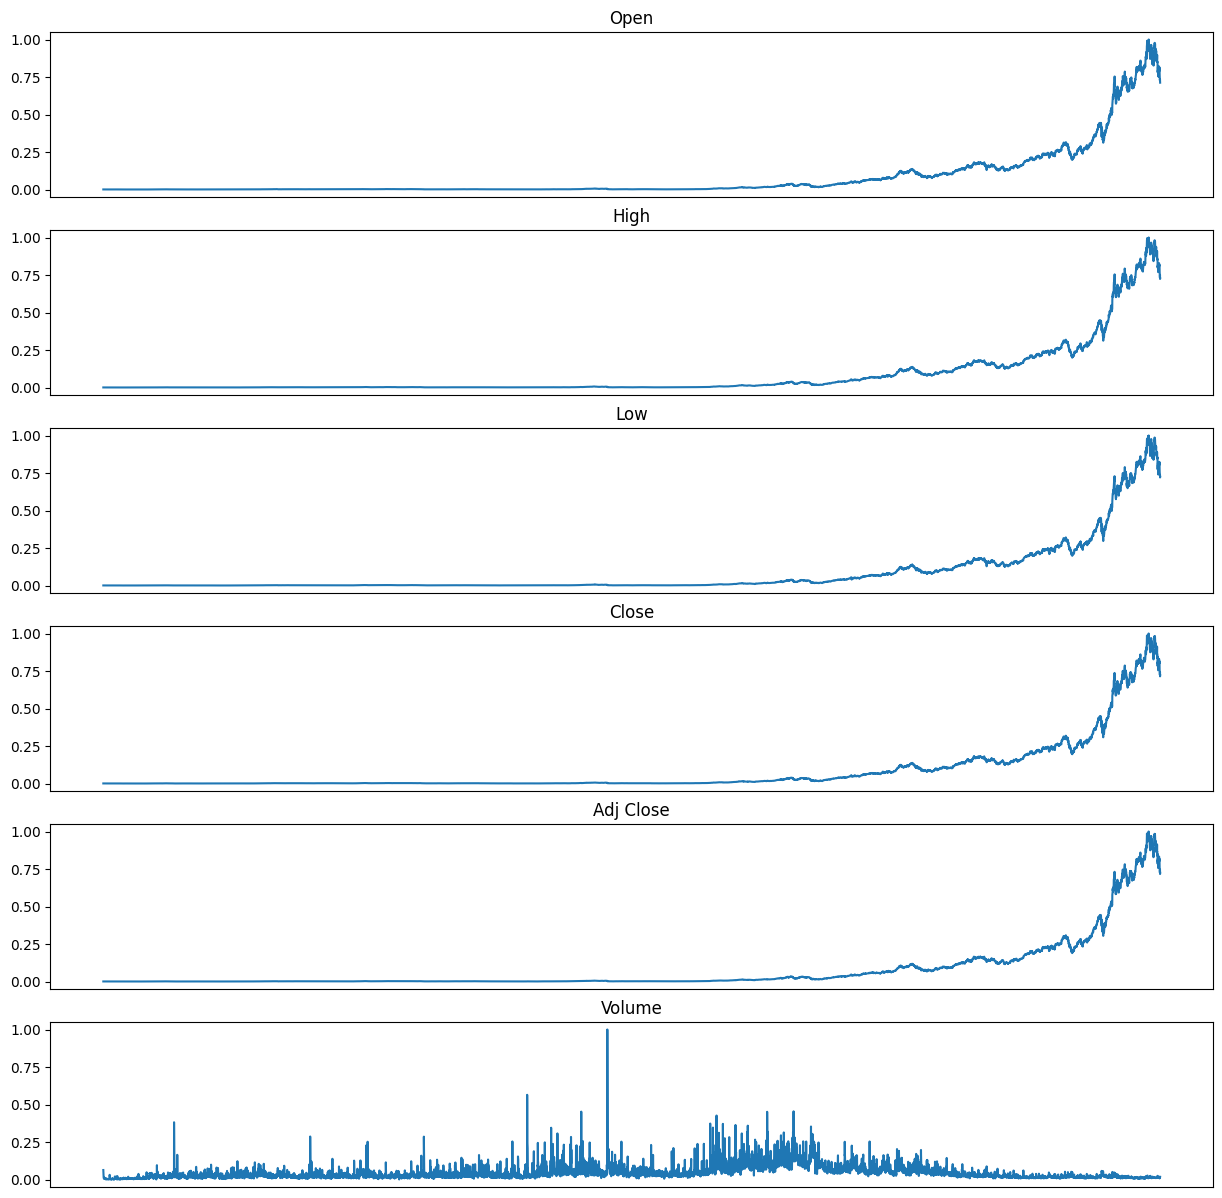

In [17]:
#plotting the columns 
plt.rcParams['figure.figsize'] = (15,15)
figure,axes= plt.subplots(6)
for ax, col in zip(axes,df_scaled.columns) :
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

In [18]:
def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):  # Move over data step by step
        X.append(data.iloc[i - window_size:i].values)  # Past `window_size` values
        y.append(data.iloc[i].values)  # Next value

    return np.array(X), np.array(y)

In [19]:
window_size= 60
X,y=  create_sequence(df_scaled,window_size)

In [20]:
X.shape, y.shape

((10408, 60, 6), (10408, 6))

In [21]:
#train test split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=42)
X_train.shape , X_test.shape

((8326, 60, 6), (2082, 60, 6))

In [22]:
model = keras.Sequential([
    # First LSTM layer
    keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),  # Corrected spelling

    # Second LSTM layer
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Third LSTM layer
    keras.layers.LSTM(units=50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # Output layer
    keras.layers.Dense(units=y_train.shape[1])  # Number of output features
])


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam',
              loss='mean_squared_error',  
              metrics=[keras.metrics.RootMeanSquaredError()]) 

In [24]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop training if no improvement for 10 epochs
    restore_best_weights=True 
)# Restore the best model weights

In [25]:
lstm_model=model.fit(X_train,y_train,
                     validation_split = 0.2 ,
                     epochs = 10 ,
                     batch_size= 3 ,
                     callbacks=[early_stopping])

Epoch 1/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 166s 70ms/step - loss: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 8.6842e-04 - val_root_mean_squared_error: 0.0295
Epoch 2/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 196s 68ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 8.4620e-04 - val_root_mean_squared_error: 0.0291
Epoch 3/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 154s 69ms/step - loss: 0.0011 - root_mean_squared_error: 0.0330 - val_loss: 4.9298e-04 - val_root_mean_squared_error: 0.0222
Epoch 4/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 542s 244ms/step - loss: 9.3506e-04 - root_mean_squared_error: 0.0305 - val_loss: 4.1198e-04 - val_root_mean_squared_error: 0.0203
Epoch 5/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - loss: 9.8898e-04 - root_mean_squared_error: 0.0314 - val_loss: 3.1606e-04 - val_root_mean_squared_error: 0.0178
Epoch 6/10
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 155s 70ms/step - loss: 8.3123e-04 - root_mean_squared_error: 0.0288 - val_loss: 3.2244e-04 - val_root_mean_squared

In [28]:
predictions= model.predict(X_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step


In [29]:
lstm_model.history

{'loss': [0.002212888328358531,
  0.0013042514910921454,
  0.0011295294389128685,
  0.0009921538876369596,
  0.0009925668127834797,
  0.0008856308995746076,
  0.0009811309864744544,
  0.0007555725169368088,
  0.00075344747165218,
  0.0007947025587782264],
 'root_mean_squared_error': [0.04704134538769722,
  0.036114420741796494,
  0.03360847383737564,
  0.03149847313761711,
  0.031505029648542404,
  0.02975955232977867,
  0.031323011964559555,
  0.027487678453326225,
  0.027448996901512146,
  0.02819046936929226],
 'val_loss': [0.0008684153435751796,
  0.0008461959077976644,
  0.0004929828573949635,
  0.0004119769437238574,
  0.00031605735421180725,
  0.0003224418906029314,
  0.000715689908247441,
  0.0003967787488363683,
  0.00035902217496186495,
  0.0007422454073093832],
 'val_root_mean_squared_error': [0.02946888841688633,
  0.029089447110891342,
  0.022203218191862106,
  0.02029721438884735,
  0.017778001725673676,
  0.01795666664838791,
  0.026752380654215813,
  0.01991930603981018

In [30]:
predictions[:10]

array([[-3.44427675e-03, -4.01620567e-03, -3.23119760e-03,
        -2.97449529e-03, -5.61462343e-03,  3.66579928e-02],
       [-3.71160358e-03, -3.84047627e-03, -3.10136378e-03,
        -2.50022113e-03, -5.66880405e-03,  4.26882617e-02],
       [ 2.90590316e-01,  2.93869495e-01,  2.94911683e-01,
         2.92427063e-01,  2.84052402e-01,  1.60245076e-02],
       [ 1.68794677e-01,  1.70093015e-01,  1.71434417e-01,
         1.69598281e-01,  1.62993550e-01,  2.21387222e-02],
       [-2.29585916e-03, -2.79090554e-03, -1.86283886e-03,
        -1.72384828e-03, -4.85790521e-03,  5.77211604e-02],
       [-2.92553753e-03, -3.70936841e-03, -2.68688798e-03,
        -2.67384946e-03, -4.76651639e-03,  1.87427420e-02],
       [-7.07872212e-04, -1.00790709e-03, -4.00692225e-05,
         1.05813146e-04, -3.77111137e-03,  8.65699202e-02],
       [-2.00658292e-03, -2.68749893e-03, -1.69469416e-03,
        -1.63085014e-03, -3.95571440e-03,  2.51535885e-02],
       [-2.06965953e-03, -2.76336074e-03, -1.773

In [31]:
#forecasting the data
#inverse scaling 
predictions=scaler.inverse_transform(predictions)
y_test_rescaled=scaler.inverse_transform(y_test)

In [32]:
predictions[:10]

array([[-5.79192221e-01, -6.84860229e-01, -5.29506445e-01,
        -4.92134780e-01, -9.80575681e-01,  2.72062464e+08],
       [-6.28000855e-01, -6.52720988e-01, -5.06256998e-01,
        -4.05835450e-01, -9.90408003e-01,  3.16816960e+08],
       [ 5.31057434e+01,  5.37955551e+01,  5.28592072e+01,
         5.32593956e+01,  5.15862770e+01,  1.18928136e+08],
       [ 3.08682556e+01,  3.11580334e+01,  3.07480202e+01,
         3.09093609e+01,  2.96173191e+01,  1.64305648e+08],
       [-3.69513750e-01, -4.60764647e-01, -2.84473211e-01,
        -2.64565974e-01, -8.43251467e-01,  4.28385728e+08],
       [-4.84480649e-01, -6.28742635e-01, -4.32036430e-01,
        -4.37429011e-01, -8.26666832e-01,  1.39101904e+08],
       [-7.95785487e-02, -1.34671465e-01,  4.19317707e-02,
         6.83608502e-02, -6.46027327e-01,  6.42490880e+08],
       [-3.16697598e-01, -4.41852570e-01, -2.54363388e-01,
        -2.47643933e-01, -6.79527879e-01,  1.86680896e+08],
       [-3.28214139e-01, -4.55726981e-01, -2.684

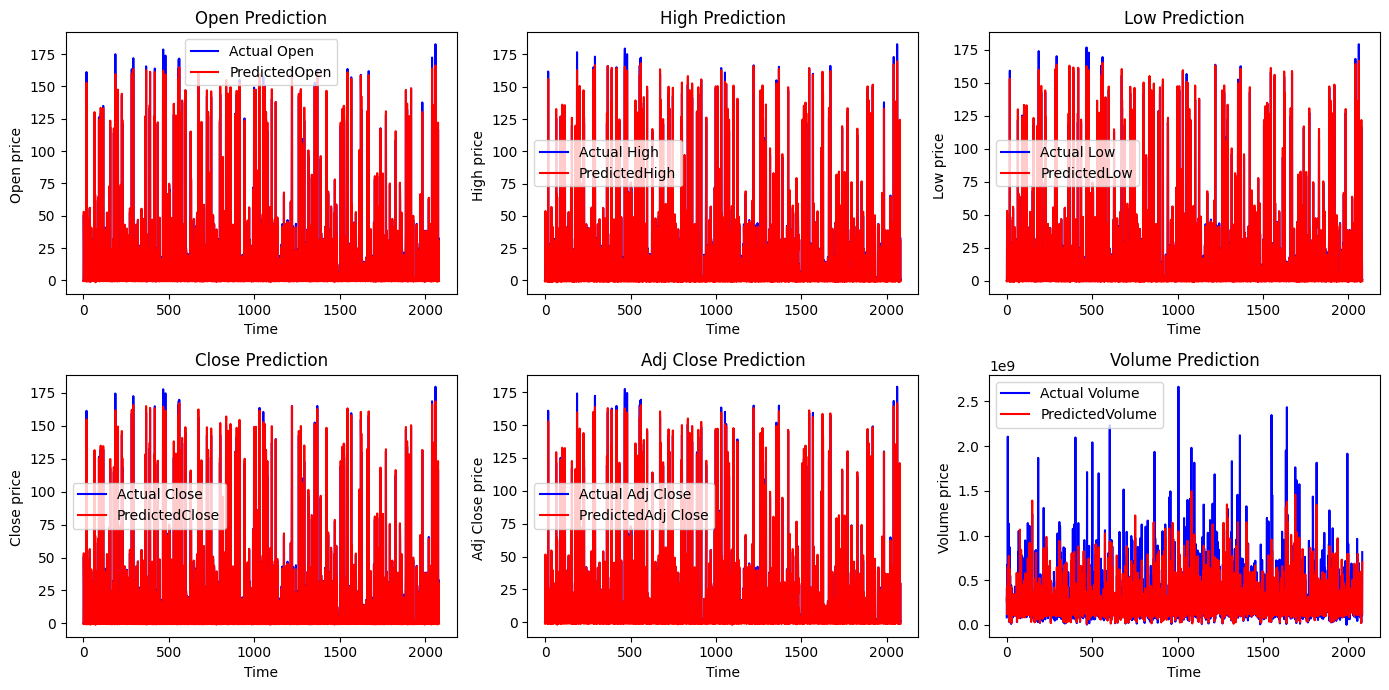

In [36]:
#plotting the results 
plt.figure(figsize=(14,7))
for i, col in enumerate(df_scaled.columns) :
    plt.subplot(2,3,i+1)
    plt.plot(y_test_rescaled[:,i],color='blue',label=f'Actual {col}')
    plt.plot(predictions[:,i],color='red',label=f'Predicted{col}')
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} price ')
    plt.legend()
    plt.tight_layout()